In [9]:
import numpy as np
import pandas as pd


In [21]:
# https://terrabrasilis.dpi.inpe.br/queimadas/situacao-atual/estatisticas

In [56]:
df = pd.read_csv('historico_estado_maranhao.csv')

In [57]:
df.head()

,Unnamed: 0,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,1998,NaN,NaN,NaN,NaN,NaN,78.0,276.0,1177.0,3933.0,5140.0,2235.0,1396.0,14235.0
1,1999,54.0,6.0,17.0,4.0,3.0,32.0,258.0,897.0,1739.0,3207.0,1494.0,1001.0,8712.0
2,2000,19.0,11.0,6.0,6.0,28.0,94.0,233.0,839.0,1364.0,2654.0,2267.0,1462.0,8983.0
3,2001,29.0,1.0,NaN,2.0,21.0,101.0,549.0,2035.0,4550.0,6597.0,3521.0,1290.0,18696.0
4,2002,49.0,116.0,16.0,28.0,71.0,227.0,1675.0,3789.0,5543.0,7152.0,8421.0,3377.0,30464.0


In [58]:
# RENOMEAR COLUNA PARA ANO
df.rename(columns={'Unnamed: 0': "ANO"}, inplace = True)

In [59]:
df.head()

,ANO,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,1998,NaN,NaN,NaN,NaN,NaN,78.0,276.0,1177.0,3933.0,5140.0,2235.0,1396.0,14235.0
1,1999,54.0,6.0,17.0,4.0,3.0,32.0,258.0,897.0,1739.0,3207.0,1494.0,1001.0,8712.0
2,2000,19.0,11.0,6.0,6.0,28.0,94.0,233.0,839.0,1364.0,2654.0,2267.0,1462.0,8983.0
3,2001,29.0,1.0,NaN,2.0,21.0,101.0,549.0,2035.0,4550.0,6597.0,3521.0,1290.0,18696.0
4,2002,49.0,116.0,16.0,28.0,71.0,227.0,1675.0,3789.0,5543.0,7152.0,8421.0,3377.0,30464.0


In [60]:
df.tail()

,ANO,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
25,2023,298.0,135.0,106.0,155.0,478.0,1338.0,2405.0,2431.0,4719.0,4283.0,2893.0,1872.0,21113.0
26,2024,457.0,98.0,159.0,95.0,434.0,1166.0,2320.0,2892.0,4132.0,4500.0,660.0,NaN,16913.0
27,Máximo*,712.0,268.0,129.0,155.0,478.0,1477.0,3693.0,10780.0,11813.0,9694.0,10348.0,5296.0,44765.0
28,Média*,316.0,63.0,47.0,71.0,194.0,686.0,1666.0,3498.0,5179.0,4942.0,4319.0,2382.0,23335.0
29,Mínimo*,19.0,1.0,6.0,2.0,3.0,32.0,233.0,839.0,1364.0,1832.0,1494.0,904.0,8712.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        30 non-null     object 
 1   Janeiro    29 non-null     float64
 2   Fevereiro  29 non-null     float64
 3   Março      28 non-null     float64
 4   Abril      29 non-null     float64
 5   Maio       29 non-null     float64
 6   Junho      30 non-null     float64
 7   Julho      30 non-null     float64
 8   Agosto     30 non-null     float64
 9   Setembro   30 non-null     float64
 10  Outubro    30 non-null     float64
 11  Novembro   30 non-null     float64
 12  Dezembro   29 non-null     float64
 13  Total      30 non-null     float64
dtypes: float64(13), object(1)
memory usage: 3.4+ KB


In [62]:
import plotly.express as px
import plotly.graph_objects as go

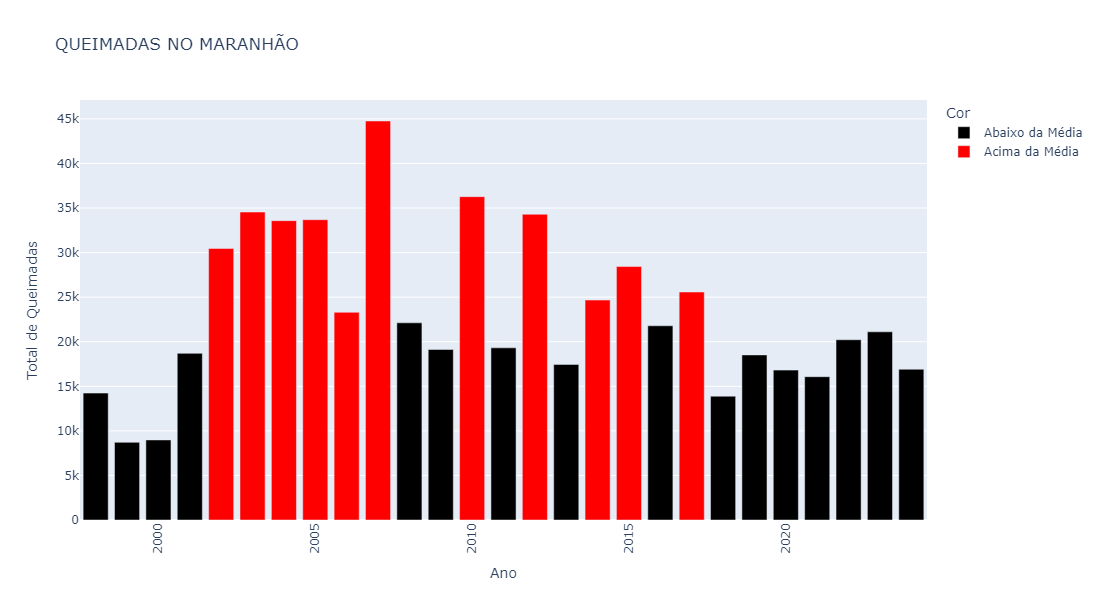

In [63]:

# Filtra apenas os anos numéricos e cria uma cópia do DataFrame filtrado
df_anos = df[pd.to_numeric(df["ANO"], errors="coerce").notnull()].copy()

# Converte a coluna "ANO" para numérico e ordena o DataFrame
df_anos["ANO"] = pd.to_numeric(df_anos["ANO"])
df_anos = df_anos.sort_values("ANO")

# Calcula a média das queimadas
media_queimadas = df_anos["Total"].mean()

# Cria uma coluna condicional para definir a cor usando .loc
df_anos.loc[:, "Cor"] = ["Acima da Média" if total > media_queimadas else "Abaixo da Média" for total in df_anos["Total"]]

# Cria o gráfico de barras com a cor condicional
fig = px.bar(
    df_anos,
    x="ANO",
    y="Total",
    title="QUEIMADAS NO MARANHÃO",
    labels={"ANO": "Ano", "Total": "Total de Queimadas"},
    color="Cor",  # Define a cor baseada na nova coluna "Cor"
    color_discrete_map={"Acima da Média": "red", "Abaixo da Média": "black"}  # Mapear as cores desejadas
)

# Ajusta o layout do gráfico
fig.update_layout(
    xaxis_tickangle=-90,
    width=1200,  # Largura do gráfico
    height=600   # Altura do gráfico
)

# Exibe o gráfico
fig.show()
